This project builds a regression model to predict median house prices in Carlifonia

In [1]:
from pathlib import Path
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px

In [2]:
#downloads the data and reads it into dataframe
def load_data(): 

    tgz_file_path = Path("datasets/housing.tgz")
    csv_file_path = Path("datasets/housing.csv")

    if not (tgz_file_path.is_file()):
        Path("datasets").mkdir(parents= False, exist_ok= True)

        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tgz_file_path)

        with tarfile.open(tgz_file_path) as tgz_file:
             tgz_file.extractall(path ="datasets")
        
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_data()


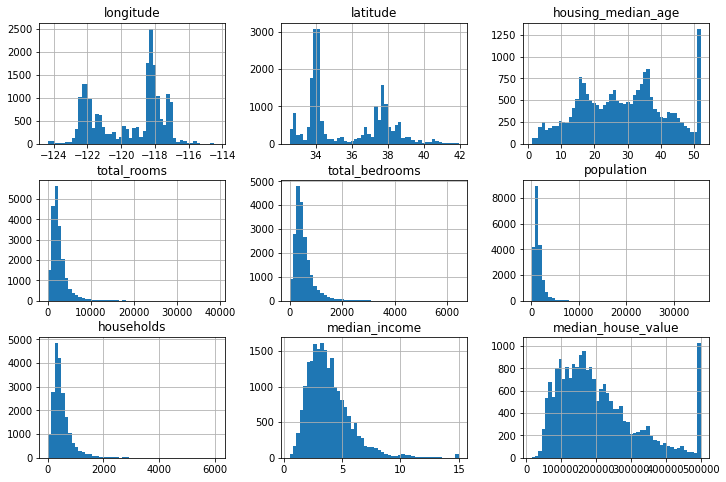

In [3]:
housing.hist(figsize = (12, 8), bins=50)
plt.show()

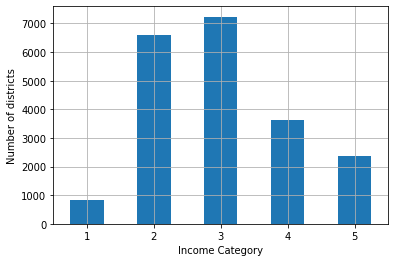

In [4]:
housing["income_category"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

housing["income_category"].value_counts().sort_index().plot.bar(grid= True, rot=0)
plt.xlabel("Income Category")
plt.ylabel('Number of districts')
plt.show()

In [5]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2,stratify=housing["income_category"])

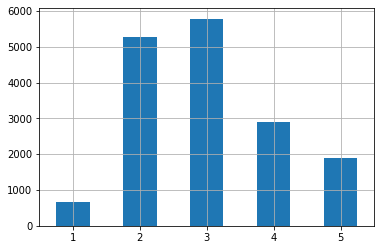

In [6]:
strat_train_set["income_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()

In [7]:
#remove the "income_category" column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace = True)


In [8]:
#get a copy of training data
housing = strat_train_set.copy()

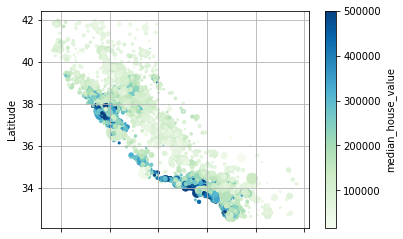

In [9]:
#visualize the location data
housing.plot.scatter(
    x="longitude", y="latitude", grid=True,
    cmap= "GnBu", c= "median_house_value", s=housing["population"]/100)
plt.xlabel("Longitude")
plt.ylabel("Latitude");


From the scatter plot above;
1. The house prices get higher as you go close the ocean.

In [10]:
fig = px.scatter_mapbox(
    housing,
    lat = "latitude",
    lon=  "longitude",
    width= 800,
    height=500,
    mapbox_style ="stamen-terrain",
    color= "median_house_value",
    size= "population",
    zoom=5
)
fig.show()

<AxesSubplot:>

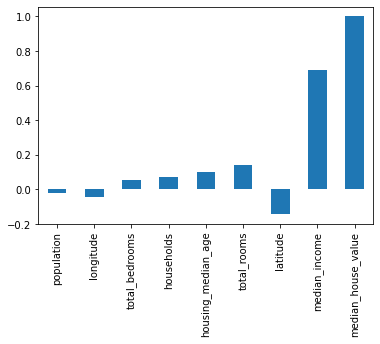

In [11]:
#Looking for correlations
housing_corr_matrix = housing.corr()
housing_corr_matrix["median_house_value"].sort_values(key=abs).plot.bar()


From the horizontal barplot above;

1. The median house value tends to go up when median income goes up.
2. The median house prices have a slight tendancy to go down when you go north.